# Historical Wind Speed over Brazil

Data source: NASA MERRA 2

## Definitions

- U winds comes from the west
    - $\vec{u} \cdot \hat{x} = \vec{u}$ 
    - $\vec{u} \cdot \hat{y} = 0$ 
- V winds comes from the south
    - $\vec{v} \cdot \hat{x} = 0$ 
    - $\vec{v} \cdot \hat{y} = \vec{v}$ 
- $\hat{y}$ is north direction
- $\hat{x}$ is east direction



## Setting-up

- https://disc.gsfc.nasa.gov/datasets?page=1&measurement=U%2FV%20Wind%20Components&project=MERRA-2&temporalResolution=3%20hours&spatialResolution=0.5%20%C2%B0%20x%200.625%20%C2%B0


## References

[1] - MERRA-2: File Specification, https://gmao.gsfc.nasa.gov/pubs/docs/Bosilovich785.pdf

In [1]:
%load_ext autotime

time: 144 µs (started: 2021-07-25 19:59:02 -03:00)


In [2]:
import xarray as xr
from tqdm.auto import tqdm
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

time: 1.18 s (started: 2021-07-25 19:59:02 -03:00)


In [3]:
DATA_PATH = '../data/historical_wind_data.nc'

time: 342 µs (started: 2021-07-25 19:59:03 -03:00)


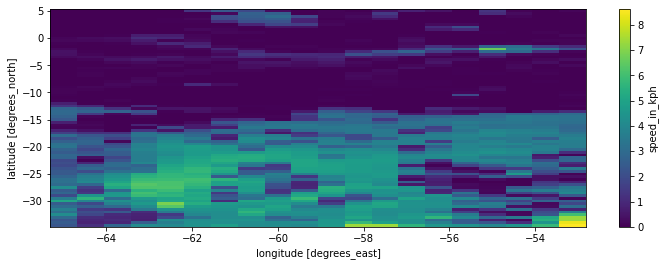

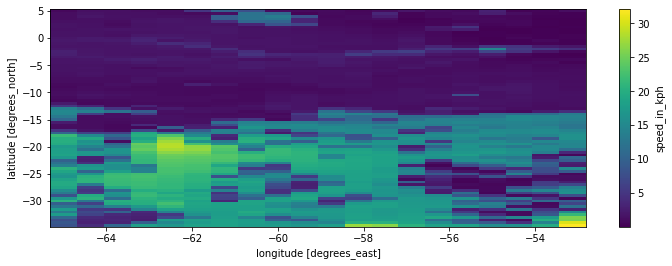

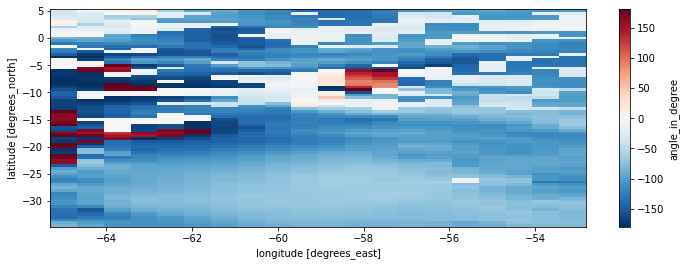

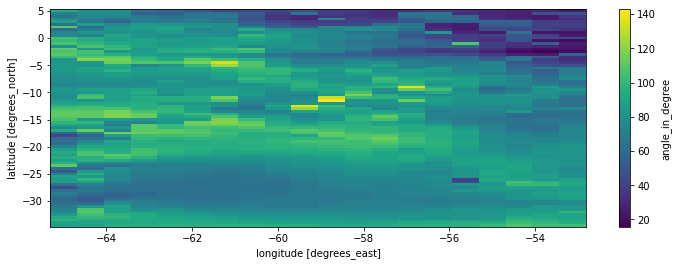

time: 29.3 s (started: 2021-07-25 19:59:03 -03:00)


In [4]:
ds = xr.open_dataset(DATA_PATH)

mask = (ds.time.dt.month == 9)
ds = ds.isel(time=mask)
mask_2 = ds.lon < -52
ds = ds.isel(lon=mask_2)
ds = ds.assign(speed_in_kph=3.6 * np.sqrt(ds.U2M * ds.U2M + ds.V2M * ds.V2M))
ds = ds.assign(angle_in_degree=np.arctan2(ds.U2M, ds.V2M) * 360 / (2 * np.pi))

# Plot Q10% wind speed
ds.speed_in_kph.reduce(np.percentile, q=10, dim='time').plot(figsize=(12, 4))
plt.show()

# Plot Q90% wind speed
ds.speed_in_kph.reduce(np.percentile, q=90, dim='time').plot(figsize=(12, 4))
plt.show()

# Plot mean wind angle
ds.angle_in_degree.reduce(st.circmean, dim='time', high=180, low=-180).plot(figsize=(12, 4))
plt.show()

# Plot std wind angle
ds.angle_in_degree.reduce(st.circstd, dim='time', high=180, low=-180).plot(figsize=(12, 4))
plt.show()

### Testing Wind Speed Distribution

#### Testing for Normality

By applying a normal test, it is possible to check if the p-values tests are below an certain threshold

If yes, then the hypothesis of the distribution belonging to an normal distribution can be rejected.

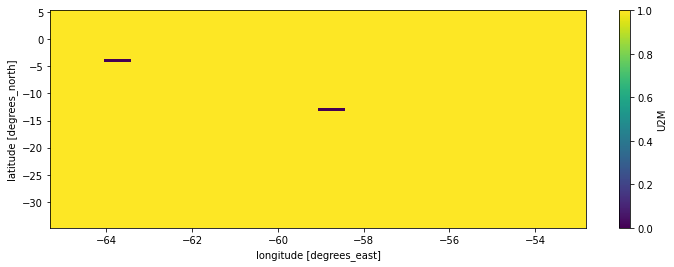

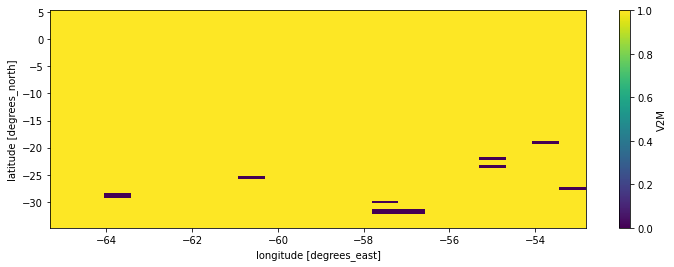

time: 9.91 s (started: 2021-07-25 19:59:32 -03:00)


In [5]:
f = lambda x, axis: st.normaltest(x, axis=axis).pvalue
(ds.U2M.reduce(f, dim='time') < 0.05).plot(figsize=(12, 4))
plt.show()

f = lambda x, axis: st.normaltest(x, axis=axis).pvalue
(ds.V2M.reduce(f, dim='time') < 0.05).plot(figsize=(12, 4))
plt.show()

#### Analyzing an single coordinate

Note that the distributions can be hard to characterize exactly

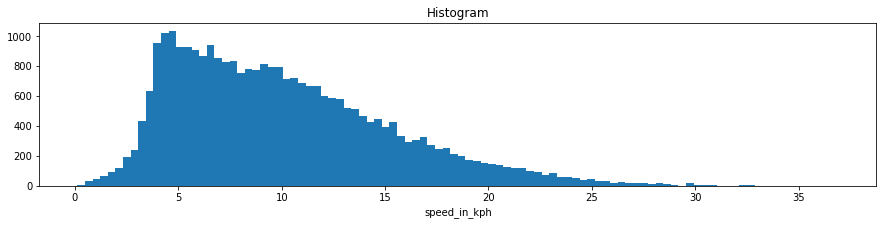

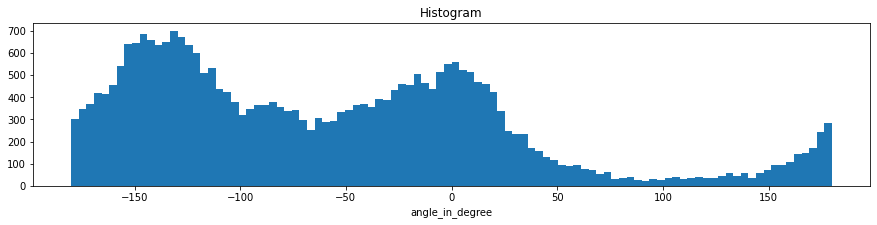

time: 287 ms (started: 2021-07-25 19:59:42 -03:00)


In [6]:
ds.speed_in_kph.isel(lat=5, lon=5).plot.hist(bins=100, figsize=(15, 3))
ds.angle_in_degree.isel(lat=5, lon=5).plot.hist(bins=100, figsize=(15, 3))
plt.show()

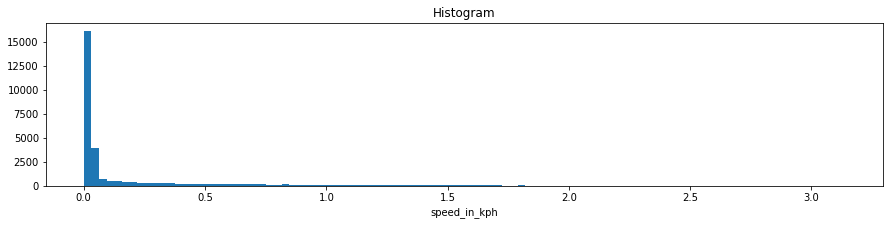

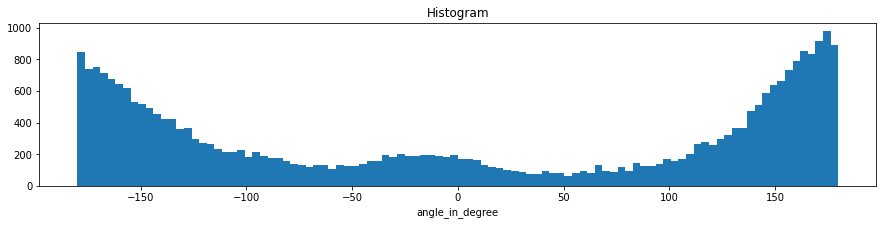

time: 279 ms (started: 2021-07-25 19:59:43 -03:00)


In [7]:
ds.speed_in_kph.isel(lat=52, lon=0).plot.hist(bins=100, figsize=(15, 3))
ds.angle_in_degree.isel(lat=52, lon=0).plot.hist(bins=100, figsize=(15, 3))
plt.show()

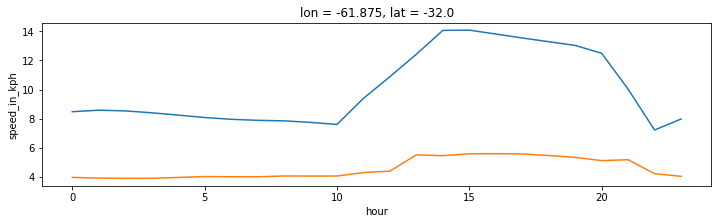

time: 99.5 ms (started: 2021-07-25 19:59:43 -03:00)


In [8]:
da = ds.speed_in_kph.isel(lat=5, lon=5)
da.groupby(da.time.dt.hour).mean().plot(figsize=(12, 3))
da.groupby(da.time.dt.hour).std().plot()
plt.show()

In [12]:
ds.speed_in_kph.std()

<xarray.DataArray 'speed_in_kph' ()>
array(5.00743389)

time: 185 ms (started: 2021-07-25 20:00:14 -03:00)


In [19]:
ds2 = ds.groupby(ds.time.dt.day).mean()
ds2 = ds2.assign(speed_in_kph=3.6 * np.sqrt(ds2.U2M * ds2.U2M + ds2.V2M * ds2.V2M))
ds2 = ds2.assign(angle_in_degree=np.arctan2(ds2.U2M, ds2.V2M) * 360 / (2 * np.pi))
ds2.speed_in_kph.std()

<xarray.DataArray 'speed_in_kph' ()>
array(1.95483017)

time: 387 ms (started: 2021-07-25 20:02:13 -03:00)


In [20]:
ds2 = ds.groupby(ds.time.dt.week).mean()
ds2 = ds2.assign(speed_in_kph=3.6 * np.sqrt(ds2.U2M * ds2.U2M + ds2.V2M * ds2.V2M))
ds2 = ds2.assign(angle_in_degree=np.arctan2(ds2.U2M, ds2.V2M) * 360 / (2 * np.pi))
print(ds2.speed_in_kph.mean())
print(ds2.speed_in_kph.std())

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/xarray/core/accessor_dt.py:380: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


<xarray.DataArray 'speed_in_kph' ()>
array(1.610869, dtype=float32)
<xarray.DataArray 'speed_in_kph' ()>
array(1.87608576)
time: 364 ms (started: 2021-07-25 20:02:47 -03:00)
